In [40]:
print("테스트")

테스트


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

train = pd.read_csv("data/bike/train.csv", parse_dates = ["datetime"])
test = pd.read_csv("data/bike/test.csv", parse_dates = ["datetime"])

print(train.shape, test.shape)

train.head()

(10886, 12) (6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Feature Engineering

## (1) NaN체크

In [42]:
train[:].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [43]:
test[:].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


## (2) date encoding 

In [44]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek

#train["minute"] = train["datetime"].dt.minute
#train["second"] = train["datetime"].dt.second

In [45]:
train.head()
train[:].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,6.000000


In [46]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3


## (3) Temp, Humidity 구간화

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000000000B8E5B70>>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


0.2 13.12
0.4 17.22
0.6 22.96
0.8 27.88
1.0 41.0
[13.12, 17.22, 22.96, 27.88, 41.0]
0
2157
1
1891
2
2352
3
2238
4
2247
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
datetime       10886 non-null datetime64[ns]
season         10886 non-null int64
holiday        10886 non-null int64
workingday     10886 non-null int64
weather        10886 non-null int64
temp           10886 non-null float64
atemp          10886 non-null float64
humidity       10886 non-null int64
windspeed      10886 non-null float64
casual         10886 non-null int64
registered     10886 non-null int64
count          10886 non-null int64
year           10886 non-null int64
month          10886 non-null int64
day            10886 non-null int64
hour           10886 non-null int64
dayofweek      10886 non-null int64
temp_encode    10886 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(13)
memory usage: 1.5 MB


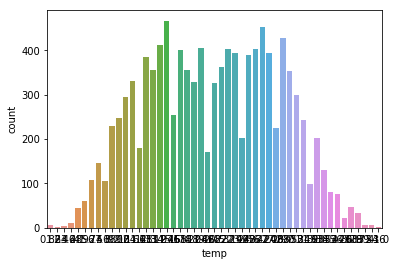

In [47]:
# 정규분포 그리는지 체크
sns.countplot(data = train, x = "temp")

# 5개 구간 구하기
temp_s = []

for i in range(5):
    temp_int = float(train["temp"].quantile((i+1)/5))
    print((i+1)/5, temp_int)
    temp_s.append(temp_int)

print(temp_s)

# 구간별 개수가 비슷한지 체크
# temp_encoding
for i in range(5):
    if i == 0:
        print(i)
        print(train.loc[train["temp"] < temp_s[i]].shape[0])
        train.loc[train["temp"] < temp_s[i], "temp_encode"] = i
    elif i != 4:
        print(i)
        print(train.loc[train["temp"] < temp_s[i]].shape[0] - train.loc[train["temp"] < temp_s[i-1]].shape[0])
        train.loc[(train["temp"] < temp_s[i]) & (train["temp"] >= temp_s[i-1]), "temp_encode"] = i 
    else:
        print(i)
        print(train.loc[train["temp"] < temp_s[i]].shape[0] - train.loc[train["temp"] < temp_s[i-1]].shape[0])
        train.loc[(train["temp"] >= temp_s[i-1]), "temp_encode"] = i
        
train[["temp", "temp_encode"]].head()
train.info()

0.2 44.0
0.4 56.0
0.6 68.0
0.8 81.0
1.0 100.0
[44.0, 56.0, 68.0, 81.0, 100.0]
2148
2193
2109
2134
2154


(10886,)

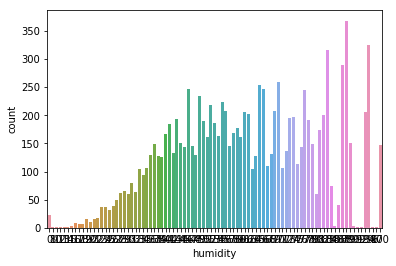

In [48]:
# 정규분포 그리는지 체크
sns.countplot(data = train, x = "humidity")

# 5개 구간 구하기
humidity_s = []

for i in range(5):
    humidity_int = float(train["humidity"].quantile((i+1)/5))
    print((i+1)/5, humidity_int)
    humidity_s.append(humidity_int)

print(humidity_s)

# 구간별 개수가 비슷한지 체크
# humidity_encoding
for i in range(5):
    if i == 0:
        print(train.loc[train["humidity"] < humidity_s[i]].shape[0])
        train.loc[train["humidity"] < humidity_s[i], "humidity_encode"] = i
    elif i != 4:
        print(train.loc[train["humidity"] < humidity_s[i]].shape[0] - train.loc[train["humidity"] < humidity_s[i-1]].shape[0])
        train.loc[(train["humidity"] < humidity_s[i]) & (train["humidity"] >= humidity_s[i-1]), "humidity_encode"] = i      
    else:
        print(train.loc[train["humidity"] < humidity_s[i]].shape[0] - train.loc[train["humidity"] < humidity_s[i-1]].shape[0])
        train.loc[(train["humidity"] >= humidity_s[i-1]), "humidity_encode"] = i
        
train[["humidity", "humidity_encode"]].head()
train["humidity_encode"].isnull().shape

0.2 12.3
0.4 18.04
0.6 24.6
0.8 28.7
1.0 40.18
[12.3, 18.04, 24.6, 28.7, 40.18]
1101
1470
1300
1271
1350
(6493,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 15 columns):
datetime       6493 non-null datetime64[ns]
season         6493 non-null int64
holiday        6493 non-null int64
workingday     6493 non-null int64
weather        6493 non-null int64
temp           6493 non-null float64
atemp          6493 non-null float64
humidity       6493 non-null int64
windspeed      6493 non-null float64
year           6493 non-null int64
month          6493 non-null int64
day            6493 non-null int64
hour           6493 non-null int64
dayofweek      6493 non-null int64
temp_encode    6493 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 761.0 KB


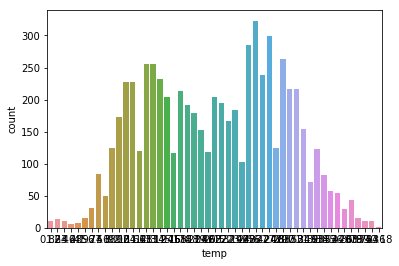

In [49]:
# 정규분포 그리는지 체크
sns.countplot(data = test, x = "temp")

# 5개 구간 구하기
temp_s = []

for i in range(5):
    temp_int = float(test["temp"].quantile((i+1)/5))
    print((i+1)/5, temp_int)
    temp_s.append(temp_int)

print(temp_s)

# 구간별 개수가 비슷한지 체크
# temp_encoding
for i in range(5):
    if i == 0:
        print(test.loc[test["temp"] < temp_s[i]].shape[0])
        test.loc[test["temp"] < temp_s[i], "temp_encode"] = i
    elif i != 4:
        print(test.loc[test["temp"] < temp_s[i]].shape[0] - test.loc[test["temp"] < temp_s[i-1]].shape[0])
        test.loc[(test["temp"] < temp_s[i]) & (test["temp"] >= temp_s[i-1]), "temp_encode"] = i        
    else:
        print(test.loc[test["temp"] < temp_s[i]].shape[0] - test.loc[test["temp"] < temp_s[i-1]].shape[0])
        test.loc[(test["temp"] >= temp_s[i-1]), "temp_encode"] = i
        
test[["temp", "temp_encode"]].head()
print(test["temp_encode"].isnull().shape)
test.info()

0.2 45.0
0.4 59.0
0.6 71.0
0.8 83.0
1.0 100.0
[45.0, 59.0, 71.0, 83.0, 100.0]
1219
1360
1294
1154
1344


,humidity,humidity_encode
0,56,1.0
1,56,1.0
2,56,1.0
3,56,1.0
4,56,1.0


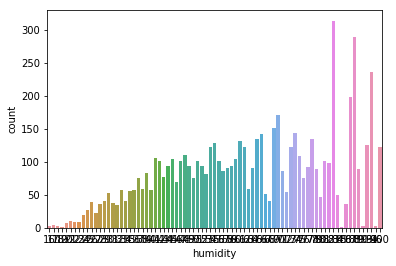

In [50]:
# 정규분포 그리는지 체크
sns.countplot(data = test, x = "humidity")

# 5개 구간 구하기
humidity_s = []

for i in range(5):
    humidity_int = float(test["humidity"].quantile((i+1)/5))
    print((i+1)/5, humidity_int)
    humidity_s.append(humidity_int)

print(humidity_s)

# 구간별 개수가 비슷한지 체크
# humidity_encoding
for i in range(5):
    if i == 0:
        print(test.loc[test["humidity"] < humidity_s[i]].shape[0])
        test.loc[test["humidity"] < humidity_s[i], "humidity_encode"] = i
    elif i != 4:
        print(test.loc[test["humidity"] < humidity_s[i]].shape[0] - test.loc[test["humidity"] < humidity_s[i-1]].shape[0])
        test.loc[(test["humidity"] < humidity_s[i]) & (test["humidity"] >= humidity_s[i-1]), "humidity_encode"] = i        
    else:
        print(test.loc[test["humidity"] < humidity_s[i]].shape[0] - test.loc[test["humidity"] < humidity_s[i-1]].shape[0])
        test.loc[test["humidity"] >= humidity_s[i-1], "humidity_encode"] = i
        
test[["humidity", "humidity_encode"]].head()
#test["humidity_encode"].isnull().shape

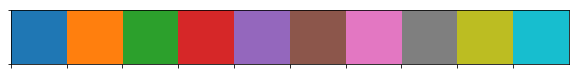

In [51]:
sns.palplot(sns.color_palette())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


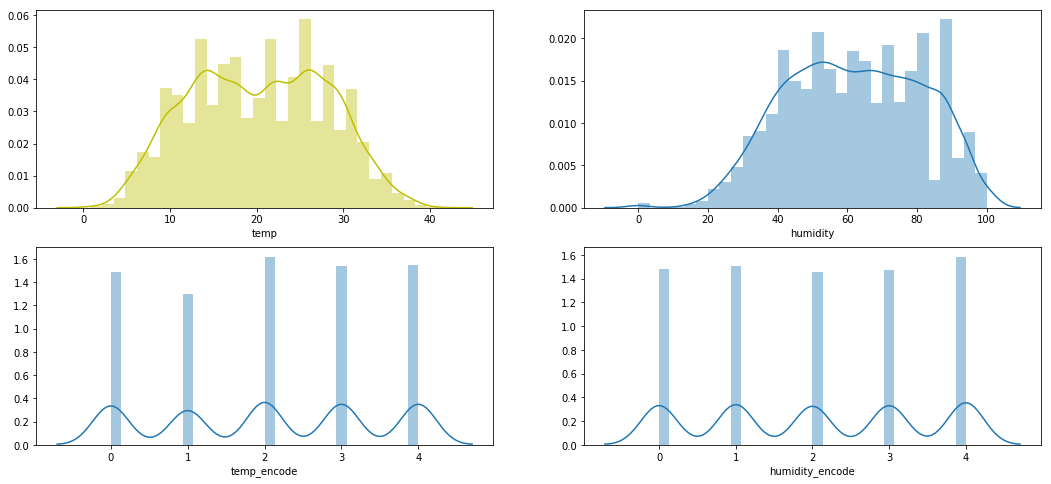

In [52]:
import matplotlib.pyplot as plt

figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots (nrows =2, ncols = 2)

figure.set_size_inches(18, 8)

sns.distplot(train["temp"], bins = 30, ax = ax1, color = "y")
sns.distplot(train["humidity"], bins = 30, ax = ax2)
sns.distplot(train["temp_encode"], bins = 30, ax = ax3)
sns.distplot(train["humidity_encode"], bins = 30, ax = ax4)

## (4) Categorization

In [53]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'dayofweek', 'temp_encode', 'humidity_encode'],
      dtype='object')

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 16 columns):
datetime           6493 non-null datetime64[ns]
season             6493 non-null int64
holiday            6493 non-null int64
workingday         6493 non-null int64
weather            6493 non-null int64
temp               6493 non-null float64
atemp              6493 non-null float64
humidity           6493 non-null int64
windspeed          6493 non-null float64
year               6493 non-null int64
month              6493 non-null int64
day                6493 non-null int64
hour               6493 non-null int64
dayofweek          6493 non-null int64
temp_encode        6493 non-null float64
humidity_encode    6493 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(10)
memory usage: 811.7 KB


category_feature = ['season', 'holiday', 'workingday',
                    'weather', 'year', 'month', 'day', 'hour', 'dayofweek']

for var in category_feature:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
datetime           10886 non-null datetime64[ns]
season             10886 non-null int64
holiday            10886 non-null int64
workingday         10886 non-null int64
weather            10886 non-null int64
temp               10886 non-null float64
atemp              10886 non-null float64
humidity           10886 non-null int64
windspeed          10886 non-null float64
casual             10886 non-null int64
registered         10886 non-null int64
count              10886 non-null int64
year               10886 non-null int64
month              10886 non-null int64
day                10886 non-null int64
hour               10886 non-null int64
dayofweek          10886 non-null int64
temp_encode        10886 non-null float64
humidity_encode    10886 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(13)
memory usage: 1.6 MB


# Model Training

In [56]:
feature_names = ['hour', 'humidity', 'atemp', 'dayofweek', 'windspeed', 'weather',
                 'season', 'workingday', 'year', 'temp_encode'] 
label_name = 'count'

In [57]:
X_train = train[feature_names]
X_test = test[feature_names]
y_train = train[label_name]

print(X_train.shape, X_test.shape, y_train.shape)

(10886, 10) (6493, 10) (10886,)


# Eval. Metrics = RMSLE 

In [58]:
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    
    predict = np.array(predict)
    actual = np.array(actual)
        
    score = np.sqrt(((np.log1p(predict) - np.log1p(actual))**2).mean())
    
    return score

score_rmsle = make_scorer(rmsle)
score_rmsle

make_scorer(rmsle)

# XGboost

In [78]:
from xgboost import XGBRegressor as xgb 
#XGBClassifier와 구분해야 함

In [79]:
xgb_model = xgb(max_depth = 8, 
                n_estimators = 4000, 
                learning_rate = 0.01, 
                max_features = 10,
                random_state = 79)
#xgb_model = xgb(n_estimators = 100, random_state = 79)
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=8, max_features=10, min_child_weight=1, missing=None,
       n_estimators=4000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=79, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

# GridSearch

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(random_state = 79)
gbm

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=79,
             subsample=1.0, verbose=0, warm_start=False)

n_estimators_list = [1000, 4000]
max_features_list = [10]
max_depth_list = [8, 10]
learning_rate_list = [0.01, 0.1]

hyperparameters_list = []

for n_estimators in n_estimators_list:
    for max_features in max_features_list:
        for max_depth in max_depth_list:
            for learning_rate in learning_rate_list:
                gbm = GradientBoostingRegressor(random_state = 79,
                                                max_features = max_features,
                                                n_estimators = n_estimators,
                                                max_depth = max_depth,
                                                learning_rate = learning_rate,
                                               )
                y_train_log = np.log1p(y_train)
                %time gbm.fit(X_train, y_train_log)
                predictions = gbm.predict(X_train)
                y_train_log_ex = (np.exp(y_train_log) - 1)
                score_gbm = rmsle(np.exp(predictions)-1, y_train_log_ex)
#                print(f"n_estimators: {n_estimators}, RMSLE Score_GBM: {score_gbm:.4f}")
                
                hyperparameters = {'score_gbm': score_gbm, 
                                   'n_estimators': n_estimators, 
                                   'max_depth' : max_depth, 
                                   'max_features' : max_features,
                                   'learning_rate' : learning_rate,
                                  }
                
                hyperparameters_list.append(hyperparameters)
                print(f"n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, learning_rate = {learning_rate}, Score = {score_gbm:.4f}")


hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score_gbm")
print(hyperparameters_list.shape)
hyperparameters_list.head(10)

hyper = hyperparameters_list
hyper.head()

gbm = GradientBoostingRegressor(random_state = 79,
                                n_estimators = hyper["n_estimators"][0],
                                max_depth = hyper["max_depth"][0],
                                max_features = hyper["max_features"][0],
                               learning_rate = hyper["learning_rate"][0],
                               )
gbm

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV

gbm = GradientBoostingRegressor(random_state = 79)
#gbm2 = GradientBoostingRegressor(n_estimators = 4000, alpha = 0.01, random_state = 79)

param_grid = {
    'n_estimators': [800],
    'max_features': [10],
	'max_depth': [8,10],
    'learning_rate': [0.1],
    'subsample': [1]
    }
        
y_train_log = np.log1p(y_train)
%time gbm.fit(X_train, y_train_log)
predictions = gbm.predict(X_train) 
y_train_log_ex = (np.exp(y_train_log) - 1)
score_gbm = rmsle(np.exp(predictions)-1, y_train_log_ex)

model = GridSearchCV(estimator=gbm, param_grid=param_grid, n_jobs=1, cv=10, scoring=rmsle)
%time model.fit(X_train, y_train_log)

#print(model.best_params_)
    
#print(f"RMSLE Score_GBM: {score_gbm:.4f}")

    param_grid = {
        'n_estimators': [800],
        'max_features': [10],
	    'max_depth': [8,10],
        'learning_rate': [0.1],
       'subsample': [1]
    }

    model = GridSearchCV(estimator=gbm, param_grid=param_grid, n_jobs=1, cv=10, scoring=score_rmsle)
    model.fit(X_train, y_train)
    
    print('Gradient boosted tree regression...')
    print('Best Params:')
    print(model.best_params_)
    print('Best CV Score:')
    print(-model.best_score_)

# Model Fit & CV - XGB

In [80]:
y_train_log = np.log1p(y_train)
%time xgb_model.fit(X_train, y_train_log)

predictions = xgb_model.predict(X_train) 
y_train_log_ex = (np.exp(y_train_log) - 1)

score_xgb = rmsle(np.exp(predictions)-1, y_train_log_ex)

print(f"RMSLE Score_XGB: {score_xgb:.4f}")

Wall time: 1min 4s
RMSLE Score_XGB: 0.0895


# Model Fit & CV

In [66]:
gbm = GradientBoostingRegressor(random_state = 79,
                                n_estimators = 1000,
                               )
gbm

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=79,
             subsample=1.0, verbose=0, warm_start=False)

In [67]:
from tqdm import tqdm, trange, tqdm_notebook
from time import sleep

pbar = ["a", "b", "c", "d"]
bar_total = tqdm_notebook(pbar)

for char in bar_total:
    sleep(0.5)
    bar_total.set_description('test: %c' % char)

## 진행바

y_train_log = np.log1p(y_train)

%time gbm.fit(X_train, y_train_log)

predictions = gbm.predict(X_train) 
# CV용이니까 X_test가 아니라 X_train임
# predictions는 이미 log1p가 적용된 결과(왜냐면, fit시킬 때, log1p기준으로 시켰으니까)

y_train_log_ex = (np.exp(y_train_log) - 1)

'''

rmsle 함수는 log1p를 처리하기전의 배열을 값으로 받아서 점수를 내준다.
그러므로 아래 3번은  log1p처리된 것끼리 비교하다 보니, 원래 값에 log1p를 씌워줘서 숫자가 작아짐
2번은 y_train만 log1p처리된 것이라 정확하지 않음
1번이 정확함

'''

score_gbm = rmsle(np.exp(predictions)-1, y_train_log_ex)
#score_gbm3 = rmsle(predictions, y_train_log)
#score_gbm2 = rmsle(np.exp(predictions)-1, y_train_log)

print(f"RMSLE Score_GBM: {score_gbm:.4f}")
#print(f"RMSLE Score_GBM2: {score_gbm2:.6f}")
#print(f"RMSLE Score_GBM3: {score_gbm3:.6f}")


Wall time: 5.74 s
RMSLE Score_GBM: 0.2605


# Feature Importance

print(gbm.feature_importances_)
print(len(gbm.feature_importances_))
print(feature_names)
print(len(feature_names))

collect = zip(feature_names, gbm.feature_importances_) # 2개의 자료형을 묶어주는 역할
print(list(collect))

feature_df = pd.DataFrame(list(zip(feature_names, gbm.feature_importances_)))
feature_df.head()

feature_df.columns = feature_df.columns.astype(str)
feature_df.columns = ["feature", "importance"]
feature_df.sort_values(by = ['importance'], ascending = False, inplace = True)
feature_df

feature_df["feature"].values

# Predict & Graph Check - XGB

In [81]:
pred_test_log = xgb_model.predict(X_test)
pred_test = np.exp(pred_test_log) - 1

print(pred_test.shape)
pred_test

(6493,)


array([ 19.57213  ,   4.533365 ,   3.2917695, ..., 106.77519  ,
        91.64652  ,  40.42578  ], dtype=float32)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


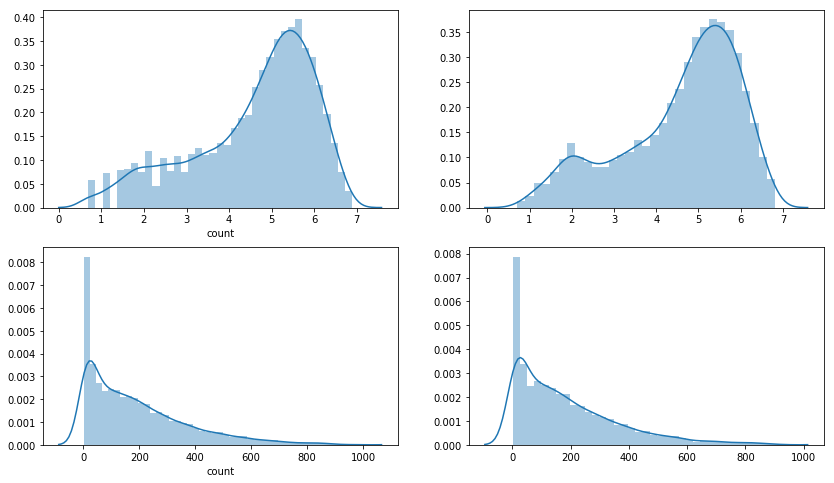

In [82]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols = 2, nrows = 2)
fig.set_size_inches(14, 8)

sns.distplot(y_train_log, ax = ax1)
sns.distplot(pred_test_log, ax = ax2)
sns.distplot(y_train, ax = ax3)
sns.distplot(pred_test, ax = ax4)

# Predict & Graph Check

pred_test_log = gbm.predict(X_test)
pred_test = np.exp(pred_test_log) - 1

print(pred_test.shape)
pred_test

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols = 2, nrows = 2)
fig.set_size_inches(14, 8)

sns.distplot(y_train_log, ax = ax1)
sns.distplot(pred_test_log, ax = ax2)
sns.distplot(y_train, ax = ax3)
sns.distplot(pred_test, ax = ax4)

In [83]:
submission = pd.read_csv("data/bike/samplesubmission.csv")
submission[label_name] = pred_test

submission.head()

,datetime,count
0,2011-01-20 00:00:00,19.572130
1,2011-01-20 01:00:00,4.533365
2,2011-01-20 02:00:00,3.291770
3,2011-01-20 03:00:00,2.797584
4,2011-01-20 04:00:00,1.900867


In [84]:
submission.index

RangeIndex(start=0, stop=6493, step=1)

In [85]:
import datetime
today_bike = datetime.datetime.today().strftime("%y%m%d")

submission.to_csv(f"data/bike/submission_bike_{score_xgb:.4f}_{today_bike}_XGB.csv", index = False)
# pd.to_csv가 아니라. submission.to_csv로 해야 함.

# submission = pd.read_csv(f"data/bike/submission_bike_{score_gbm:.4f}_{today_bike}_XGB.csv")

submission.to_csv(f"data/bike/submission_bike_{score_gbm:.4f}_{today_bike}.csv", index = False)
# pd.to_csv가 아니라. submission.to_csv로 해야 함.

submission = pd.read_csv(f"data/bike/submission_bike_{score_gbm:.4f}_{today_bike}.csv")

submission